In [141]:

#  ███████╗████████╗ █████╗ ████████╗██╗███████╗████████╗██╗ ██████╗ █████╗ ██╗         
#  ██╔════╝╚══██╔══╝██╔══██╗╚══██╔══╝██║██╔════╝╚══██╔══╝██║██╔════╝██╔══██╗██║         
#  ███████╗   ██║   ███████║   ██║   ██║███████╗   ██║   ██║██║     ███████║██║         
#  ╚════██║   ██║   ██╔══██║   ██║   ██║╚════██║   ██║   ██║██║     ██╔══██║██║         
#  ███████║   ██║   ██║  ██║   ██║   ██║███████║   ██║   ██║╚██████╗██║  ██║███████╗    
#  ╚══════╝   ╚═╝   ╚═╝  ╚═╝   ╚═╝   ╚═╝╚══════╝   ╚═╝   ╚═╝ ╚═════╝╚═╝  ╚═╝╚══════╝    
#                                                                                       
#  ██████╗  █████╗ ██████╗  █████╗ ███╗   ███╗███████╗████████╗███████╗██████╗ ███████╗ 
#  ██╔══██╗██╔══██╗██╔══██╗██╔══██╗████╗ ████║██╔════╝╚══██╔══╝██╔════╝██╔══██╗██╔════╝ 
#  ██████╔╝███████║██████╔╝███████║██╔████╔██║█████╗     ██║   █████╗  ██████╔╝███████╗ 
#  ██╔═══╝ ██╔══██║██╔══██╗██╔══██║██║╚██╔╝██║██╔══╝     ██║   ██╔══╝  ██╔══██╗╚════██║ 
#  ██║     ██║  ██║██║  ██║██║  ██║██║ ╚═╝ ██║███████╗   ██║   ███████╗██║  ██║███████║ 
#  ╚═╝     ╚═╝  ╚═╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚══════╝   ╚═╝   ╚══════╝╚═╝  ╚═╝╚══════╝ 
#                                                                                       
import requests
from faker import Faker
from faker import Factory
import ujson as json
import pandas as pd
import requests
import certifi
from numpy import random 
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from elasticsearch_dsl import Search, DocType, Date, Integer, Keyword, Text
from datetime import datetime
from elasticsearch_dsl.connections import connections
import pandas as pd
import requests
from random import randint
from datetime import datetime, timedelta
import math
import numpy as np
from pandas.io.json import json_normalize
from pandasticsearch import DataFrame
from pandasticsearch import Select
from matplotlib import pyplot as plt
import seaborn as sns

ES_HOST = 'http://team.ankit.one:9200'
INDEX = "eda_small"
DOC_TYPE="user"
es = Elasticsearch(ES_HOST)

In [143]:
query = {
            "from" : 0, 
            "size" : 5000,
            "query": {
                        "match_all": {}
                     }
            }
result_dict = es.search(index=INDEX, body=query)
df = Select.from_dict(result_dict).to_pandas()
df = df.set_index(['_id'])
df.drop(['_index', '_score', '_type'],inplace=True,axis=1,errors='ignore')
df.head()

,Avg Order Value,City,days_since_last_purchase,discount_percentage,email_unsubscribe,f_score,lifecycle,m_score,name,num_of_orders,r_score,revenue,rfm_score,segments,total_discount_revenue
_id,,,,,,,,,,,,,,,
199e45e7-d14b-5633-b711-ab327612dc04,0.0,Mumbai,91,25,False,0,Contact,0,Kathryn Martin,0,3,0,3,[],0.0
4f8b3348-0fcb-e402-57f0-32b6a323d6fc,0.0,Noida,53,27,False,0,Contact,0,Patricia Green,0,5,0,5,"[NCR, High Discount Seeker]",0.0
14708bac-41d2-b9b0-15dd-ac236751e157,0.0,Vadodara,33,25,False,0,Contact,0,Carlos Nguyen,0,6,0,6,[],0.0
4d51c096-0ddc-cd66-2d35-1bed44752ece,0.0,Ahmedabad,24,27,False,0,Contact,0,Jennifer King,0,7,0,7,[High Discount Seeker],0.0
0f53503b-df12-8723-7d50-5f83abd9d425,0.0,Pune,1,20,False,0,Contact,0,Samantha Scott,0,9,0,9,[],0.0


# 1. Intro 
A parameter is any numerical quantity that characterizes a given population or some aspect of it. This means the parameter tells us something about the whole population.

The most common statistics parameters are the measures of central tendency. These tell us how the data behaves on an average basis. For example, mean, median and mode are measures of central tendency that give us an idea about where the data concentrates. Standard deviation tells us how the data is spread from the central tendency, i.e. whether the distribution is wide or narrow. Such parameters are often very useful in analysis.

Among parameterized families of distributions are the normal distributions, the Poisson distributions, the binomial distributions, and the exponential family of distributions. 
- The family of **normal distributions** has two parameters, the mean and the variance: if these are specified, the distribution is known exactly. 
- The family of **chi-squared distributions**, on the other hand, has only one parameter, the number of degrees of freedom.
- The family of **poisson distributions**, on the other hand, has only one parameter, λ is the shape parameter which indicates the average number of events in the given time interval.

## 1.1  Population and Parameter
- A population is any large collection of objects or individuals, such as Americans, students, or trees about which information is desired.
- A parameter is any summary number, like an average or percentage, that describes the entire population.

## 1.2 Sample and Statistics
- A sample is a representative group drawn from the population.
- A statistic is any summary number, like an average or percentage, that describes the sample.

## 1.3 Optimal Parameters
Parameters values that bring the model in closest agreement with the data

In [13]:
df.columns

Index(['Avg Order Value', 'City', 'days_since_last_purchase',
       'discount_percentage', 'email_unsubscribe', 'f_score', 'lifecycle',
       'm_score', 'name', 'num_of_orders', 'r_score', 'revenue', 'rfm_score',
       'segments', 'total_discount_revenue'],
      dtype='object')

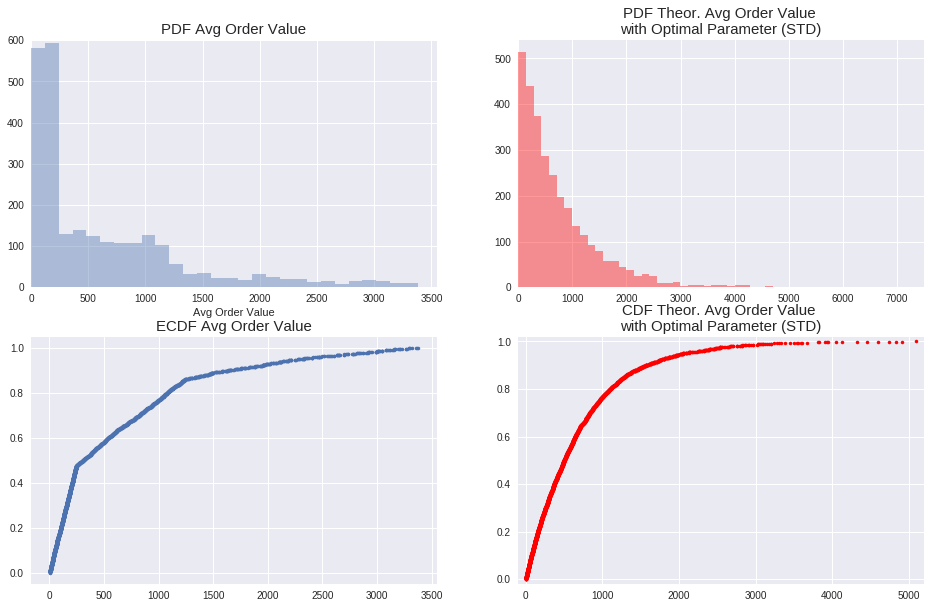

In [137]:
avg_order_value_mean = np.mean(df['Avg Order Value'])
avg_order_value_sd = np.std(df['Avg Order Value'])

## Removing Outliers
p = df["Avg Order Value"].quantile(0.1)
q = df["Avg Order Value"].quantile(0.99)
#and then filter with:
new_df = df[(df["Avg Order Value"] > p) & (df["Avg Order Value"] < q)]
avg_order_value_mean = np.mean(new_df['Avg Order Value'])
avg_order_value_sd = np.std(new_df['Avg Order Value'])
avg_order_value_theor = np.random.exponential(avg_order_value_sd, 3000)

## Calculate ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
# Number of data points: n
    n = len(data)
# x-data for the ECDF: x
    x = np.sort(data)
# y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

fig, axes = plt.subplots(2,2, figsize=(16,10))
sns.distplot(new_df['Avg Order Value'], kde=False, hist=True, ax = axes[0,0])
axes[0,0].set_title("PDF Avg Order Value", fontsize=15)
axes[0,0].set_xlim(0,)
axes[0,0].set_ylim(0,600)

sns.distplot(avg_order_value_theor, hist=True, kde=False, ax = axes[0,1], color="red")
axes[0,1].set_title("PDF Theor. Avg Order Value \nwith Optimal Parameter (STD)", fontsize=15)
axes[0,1].set_xlim(0,)
axes[0,0].set_ylim(0,600)

x,y = ecdf(new_df['Avg Order Value'])
axes[1,0].plot(x,y,marker=".", linestyle="none")
axes[1,0].set_title("\nECDF Avg Order Value", fontsize=15)

x_theor,y_theor = ecdf(x_theor)
axes[1,1].plot(x_theor,y_theor, marker=".", linestyle="none", color="red")
axes[1,1].set_title("\nCDF Theor. Avg Order Value \nwith Optimal Parameter (STD)", fontsize=15)
plt.margins(0.02)
_ = plt.show()




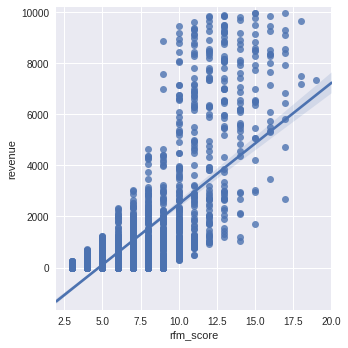

In [96]:
sns.lmplot("rfm_score", "revenue", data=df)
# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('rfm_score')
_ = plt.ylabel('revenue')

# Show the plot
plt.show()



795.329644264 41.0649346851


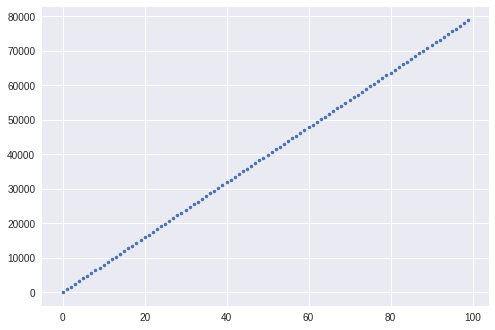

In [126]:
a, b = np.polyfit(df.num_of_orders, df.revenue, 1)
print(a,b)
x = np.arange(100)
y = a*x +b
_ = plt.plot(x, y, marker=".", linestyle="none")
plt.show()


## 2. Bootstrapping 
It is a statistical technique that falls under the broader heading of resampling.  This technique involves a relatively simple procedure, but repeated so many times that it is heavily dependent upon computer calculations.  Bootstrapping provides a method other than confidence intervals to estimate a population parameter.

### 2.1 An Explanation of Bootstrapping

One goal of inferential statistics is to determine the value of a parameter of a population. It is typically too expensive or even impossible to measure this directly. So we use statistical sampling. We sample a population, measure a statistic of this sample, and then use this statistic to say something about the corresponding parameter of the population.

> The process of repeatedly resampling from your observed sample has been shown to mimic the process of the original sampling from the whole population.

###### The population is to the sample what the sample is to the bootstrapped sample

- Bootstrapping - Use of resampling data to perform statistical inference
- Bootstrap Sample - Each resampled array
- Bootstrap Replciate - Value of summary statistics computed from a resampled array

## 3. Confidence Interval

### 3.1 Point Estimate
When a parameter is being estimated, the estimate can be either a single number or it can be a range of numbers such as in a confidence interval. When the estimate is a single number, the estimate is called a "point estimate." A point estimate by itself is of limited usefulness because it does not reveal the uncertainty associated with the estimate; you do not have a good sense of how far this sample mean may be from the population mean.



### 3.2 Confidence Interval of a Statistics
If repeated samples were taken and the p% confidence interval computed for each sample, p% of the intervals would contain the population mean. 

### 3.3 How to Interpret Confidence Intervals

Suppose that a 90% confidence interval states that the population mean is greater than 100 and less than 200. How would you interpret this statement?

Some people think this means there is a 90% chance that the population mean falls between 100 and 200. This is incorrect. Like any population parameter, the population mean is a constant, not a random variable. It does not change. The probability that a constant falls within any given range is always 0.00 or 1.00.

The confidence level describes the uncertainty associated with a sampling method. Suppose we used the same sampling method to select different samples and to compute a different interval estimate for each sample. Some interval estimates would include the true population parameter and some would not. A 90% confidence level means that we would expect 90% of the interval estimates to include the population parameter; A 95% confidence level means that 95% of the intervals would include the parameter; and so on.

## 4 Parametric and Non-parametric Inference
Parametric statistical inference is one that makes assumptions about the parameters (defining properties) of the population distribution(s) from which one's data are drawn, while a non-parametric test is one that makes no such assumptions. 

### 4.1 Parametric Inference
Typical assumptions are:

- Normality: Data have a normal distribution (or at least is symmetric)
- Homogeneity of variances: Data from multiple groups have the same variance
- Linearity: Data have a linear relationship
- Independence: Data are independent

> for e.g a Normal Distribution, assumption is that the graph of the data has the shape of a bell curve. Such data is symmetric around its mean and has kurtosis equal to zero. 

> Some tests (e.g. Regression) require that there be a linear correlation between the dependent and independent variables. Generally linearity can be tested graphically using scatter diagrams

> another example if we measure the monthly weight of 10 people over the course of 5 months, these 50 observations are not independent since repeated measurements from the same people are not independent. 


### 4.2 Non-parametric Inference

In general, non-parametric tests:

- make few or no assumptions about the distribution of the data
- reduce the effect of outliers and heterogeneity of variance
- can often be used even for ordinal, and sometimes even nominal, data

Since non-parametric tests do not estimate population parameters, in general there are

- no estimates of variance/variability
- no confidence intervals
- fewer measures of effect size

Also non-parametric tests are generally not as powerful as parametric alternatives when the assumptions of the parametric tests are met.